<a href="https://colab.research.google.com/github/GiuseppeELio/FRESCO-Board/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm

In [10]:
!unzip 2024.zip -d ./

Archive:  2024.zip
   creating: ./2024/
  inflating: ./__MACOSX/._2024       
  inflating: ./2024/.DS_Store        
  inflating: ./__MACOSX/2024/._.DS_Store  
   creating: ./2024/07/
  inflating: ./__MACOSX/2024/._07    
  inflating: ./2024/07/.DS_Store     
  inflating: ./__MACOSX/2024/07/._.DS_Store  
   creating: ./2024/07/16/
  inflating: ./__MACOSX/2024/07/._16  
   creating: ./2024/07/17/
  inflating: ./__MACOSX/2024/07/._17  
   creating: ./2024/07/15/
  inflating: ./__MACOSX/2024/07/._15  
   creating: ./2024/07/14/
  inflating: ./__MACOSX/2024/07/._14  
  inflating: ./2024/07/16/DATA.TXT   
  inflating: ./__MACOSX/2024/07/16/._DATA.TXT  
  inflating: ./2024/07/17/DATA.TXT   
  inflating: ./__MACOSX/2024/07/17/._DATA.TXT  
  inflating: ./2024/07/15/DATA.TXT   
  inflating: ./__MACOSX/2024/07/15/._DATA.TXT  
  inflating: ./2024/07/14/DATA.TXT   
  inflating: ./__MACOSX/2024/07/14/._DATA.TXT  


In [11]:
def read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year):
    file_paths = []
    for year in range(start_year, end_year + 1):
        for month in range(start_month, 13):
            for day in range(start_day, 32):
        # for month in range(start_month, end_month + 1):
        #     for day in range(start_day, end_day + 1):
                folder_path = os.path.join(f"{year:04d}", f"{month:02d}", f"{day:02d}")
                if os.path.exists(folder_path):
                    file_path = os.path.join(folder_path, "DATA.TXT")
                    if os.path.exists(file_path):
                        file_paths.append(file_path)

    outfname = "DATA_collated.txt"
    lines_seen = set() # hold lines already seen once (i.e., the headers)
    with open(outfname, "w") as outfile:
        for file_path in file_paths:
            for line in open(file_path, "r"):
                if line not in lines_seen:
                    outfile.write(line)
                    lines_seen.add(line)

In [12]:
start_day, start_month, start_year = 14, 7, 2024
end_day, end_month, end_year = 17, 7, 2024

read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year)

In [13]:
df = pd.read_csv("DATA_collated.txt", header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True) #ugly trick to skip the repeated header line
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD1,TPC1,PD2,TPC2,TSet1
count,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000,245356.000000
mean,28.375957,52.887804,30.018848,48.252233,29.015203,45.312570,26.698471,26.080037,27.891431,28.126620,27.453391,39.911045,362.543239,29.981730,5.291836,54.430037,28.720584,44.164733,28.980178,28.375325
std,5.804651,10.447122,7.059728,12.302939,6.034544,13.434886,8.766251,8.640622,8.896831,9.026014,8.328334,3.735720,362.601294,8.080565,3.612596,46.498844,6.487704,41.276528,6.679482,5.807455
min,19.500000,34.700000,18.400000,30.100000,19.500000,24.100000,14.160000,13.660000,15.340000,15.040000,15.340000,31.060000,0.000000,17.710000,-1.130000,0.000000,18.380000,0.000000,18.040000,0.000000
25%,23.300000,43.000000,23.200000,37.500000,23.600000,32.600000,18.680000,18.090000,19.760000,19.660000,19.660000,36.880000,0.000000,22.590000,2.390000,0.000000,23.010000,0.000000,23.050000,23.300000
50%,28.000000,52.600000,30.500000,45.600000,28.600000,44.000000,24.340000,24.040000,25.560000,26.270000,25.960000,40.630000,290.230000,28.670000,4.570000,65.420000,27.770000,46.330000,28.020000,28.000000
75%,34.200000,61.500000,36.700000,59.100000,35.000000,56.200000,35.790000,35.110000,37.160000,37.730000,36.010000,42.750000,738.490000,38.310000,8.690000,95.030000,35.110000,78.270000,35.382500,34.200000
max,39.500000,74.000000,41.700000,75.700000,39.200000,74.300000,41.810000,40.580000,42.940000,43.570000,41.440000,48.560000,964.760000,45.170000,14.210000,396.000000,39.980000,395.550000,41.320000,39.400000


In [14]:
rw = '0.5H'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')

<ipython-input-14-bedda6819270>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfroll = df.rolling(window=rw).mean()


In [15]:
dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

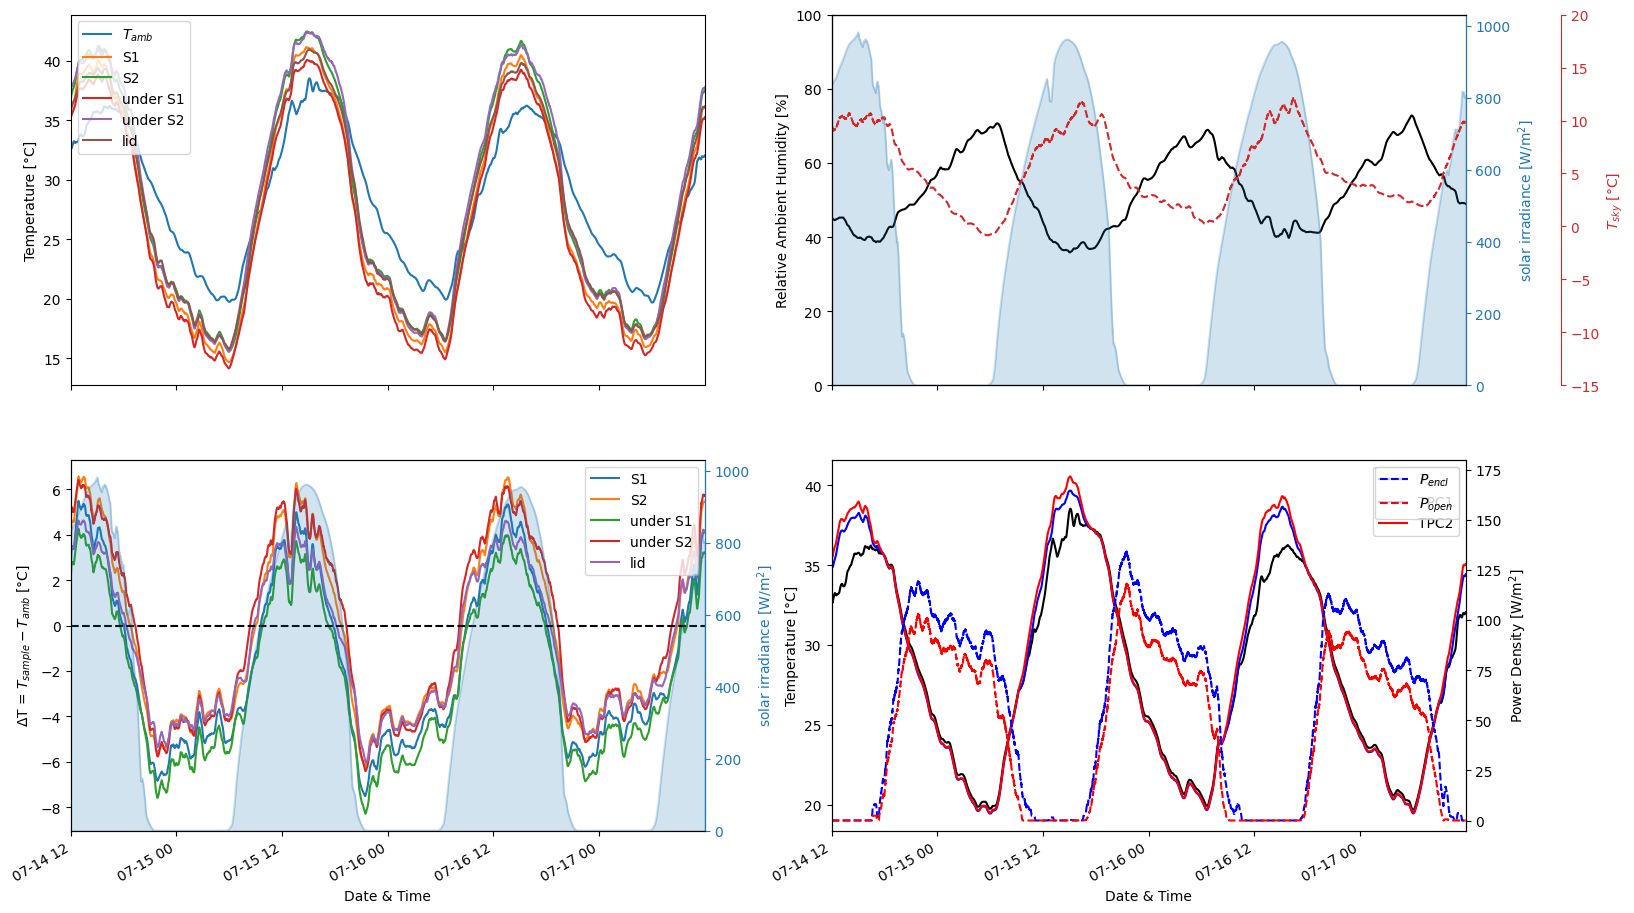

In [16]:
import matplotlib.pyplot as plt

# If needed you can adjust some value such as the irradiance if you system results not well alligned with a weather station
dfroll['Irm'] = dfroll['Ir'] * 1.05

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(18,12))
#First Plot
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1','TS3', 'TS2', 'TS4','Tbx' ])
axarr[0, 0].legend(['$T_{amb}$','S1','S2','under S1','under S2','lid'], loc='upper left')
axarr[0, 0].set_ylabel('Temperature [°C]')
axarr[0, 0].autoscale(enable=True, axis='x', tight=True)

#Second Plot
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1'], ylim=(0, 100), legend=False, color=['black'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Irm', alpha=0.2, legend=False)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].set_ylabel('Temperature [°C]')
axarr[0, 1].set_ylabel('Relative Ambient Humidity [%]')
axarr[0, 1].autoscale(enable=True, axis='x', tight=True)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 20), color='#d62728', legend=False, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728')
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.15))
ax_sky.tick_params(axis='y', colors='#d62728')

#Third Plot
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1','ΔT3','ΔT2','ΔT4','ΔTbx'])
dfroll.plot.area(ax=ax_dif, y='Irm', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('ΔT = $T_{sample} - T_{amb}$ [°C]')
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
axarr[1, 0].set_xlabel('Date & Time')
axarr[1, 0].legend(['S1','S2','under S1','under S2','lid'], loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')
axarr[1, 0].autoscale(enable=True, axis='x', tight=True)

#Fourth Plot
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'TPC1', 'TPC2'], color=['black', 'blue', 'red', 'green'])
axarr[1, 1].set_ylabel('Temperature [°C]')

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD1', 'PD2'], color=['blue', 'red'], linestyle='--')
plt.ylim(-5, 180)
#axarr[1, 1].legend(['Pow 3M', 'Pow CS'])
axarr[1, 1].set_xlabel('Date & Time')
ax_pow.set_ylabel('Power Density [W/m$^2$]')

axarr[1, 1].legend(['$T_{amb}$', 'TPC1', 'TPC2'])
ax_pow.legend(['$P_{encl}$', '$P_{open}$'])
axarr[1, 1].autoscale(enable=True, axis='x', tight=True)

<ipython-input-17-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-17-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-17-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-17-6e9434533ef5>:23: FutureW

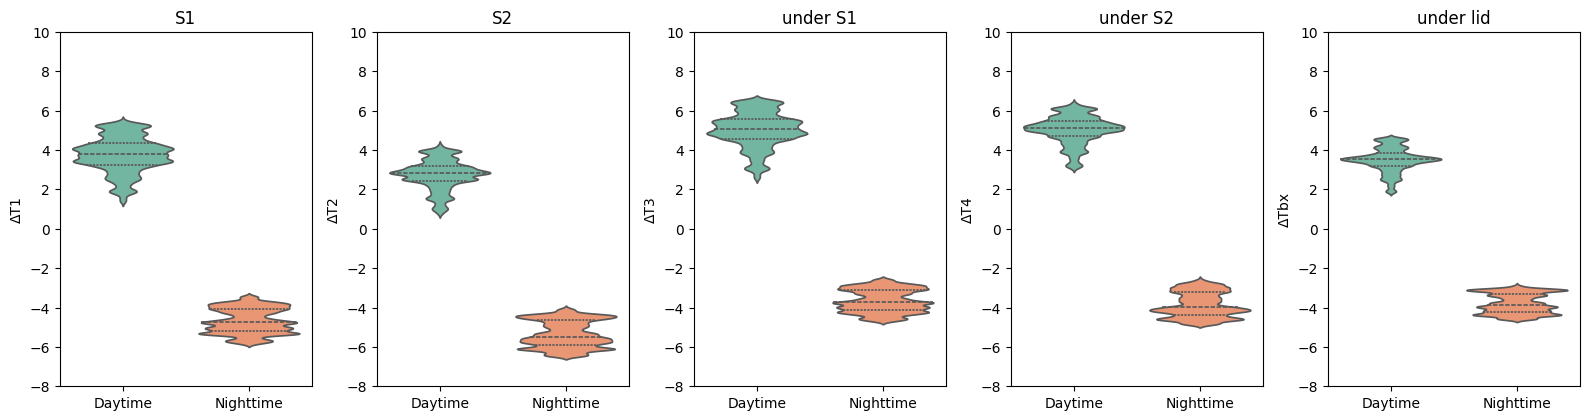

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dfroll' is your dataframe and columns are "ΔT1" through "ΔT4"
day_start_hour, day_end_hour = 11, 16
night_start_hour, night_end_hour = 0, 5

# Create daytime and nighttime masks
day_mask = (dfroll.index.hour >= day_start_hour) & (dfroll.index.hour < day_end_hour)
night_mask = (dfroll.index.hour >= night_start_hour) & (dfroll.index.hour < night_end_hour) if night_start_hour < night_end_hour else (dfroll.index.hour >= night_start_hour) | (dfroll.index.hour < night_end_hour)

# Filter NaN values for each column
column_names = ["ΔT1", "ΔT2", "ΔT3", "ΔT4", "ΔTbx"]
titles = ['S1', 'S2', 'under S1', 'under S2', 'under lid']
daytime_data = {col: dfroll.loc[day_mask, col].dropna() for col in column_names}
nighttime_data = {col: dfroll.loc[night_mask, col].dropna() for col in column_names}

# Create violin plots
plt.figure(figsize=(16, 8))
for i, col in enumerate(column_names):
    plt.subplot(2, len(column_names), i + 1)
    sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
                   y=pd.concat([daytime_data[col], nighttime_data[col]]), inner="quartile", palette="Set2")
    plt.title(titles[i])
    plt.ylim(-8, 10)

plt.tight_layout()
plt.show()

In [18]:
for i, col in enumerate(column_names):
    print(f"{titles[i]}: \t mean daytime ΔT = {daytime_data[col].mean():.1f} \t mean nighttime ΔT = {nighttime_data[col].mean():.1f}")

S1: 	 mean daytime ΔT = 3.8 	 mean nighttime ΔT = -4.7
S2: 	 mean daytime ΔT = 2.7 	 mean nighttime ΔT = -5.3
under S1: 	 mean daytime ΔT = 5.0 	 mean nighttime ΔT = -3.7
under S2: 	 mean daytime ΔT = 5.0 	 mean nighttime ΔT = -3.9
under lid: 	 mean daytime ΔT = 3.5 	 mean nighttime ΔT = -3.8
